In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
movies = pd.read_csv('data/ml-20m/movies.csv')
ratings = pd.read_csv('data/ml-20m/ratings.csv')
tags = pd.read_csv('data/ml-20m/tags.csv')
movies_x_genres = pd.merge(movies, ratings)
movies_x_genres_one_hot = pd.concat([movies_x_genres.drop('genres', axis=1), movies_x_genres.genres.str.get_dummies(sep='|')], axis=1)  

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
movies_x_genres.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [7]:
movies_x_genres_one_hot.head()

,movieId,title,userId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3,4.0,944919407,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),6,5.0,858275452,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8,4.0,833981871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),10,4.0,943497887,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),11,4.5,1230858821,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
movies_x_genres.groupby('title').size().sort_values(ascending=False)[:10]

title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
dtype: int64

In [9]:
'''plt.subplots(figsize=(10,5))
sns.countplot(x='genres', order = movies_x_genres['genres'].value_counts().index, data=movies_x_genres);
plt.xticks(rotation=-45)
plt.title('Number of ratings per genre'); '''

"plt.subplots(figsize=(10,5))\nsns.countplot(x='genres', order = movies_x_genres['genres'].value_counts().index, data=movies_x_genres);\nplt.xticks(rotation=-45)\nplt.title('Number of ratings per genre'); "

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)

In [12]:
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]

(1915.0, 2020.0)

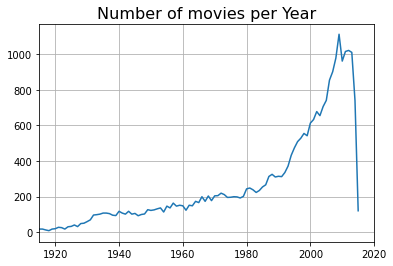

In [13]:
plt.plot(movies.groupby(['year']).count()['title'])
plt.title('Number of movies per Year',fontsize=16)
plt.grid(True)
plt.xlim(1915, 2020)

In [14]:
ratings.head()

,userId,movieId,rating,timestamp
0,97809,1,3.0,1213159631
1,106140,1,5.0,1359430429
2,106138,1,3.0,1028130533
3,70354,1,4.5,1297623340
4,70355,1,3.5,1201366614


In [15]:
# Categorize movies genres properly. Working later with +20MM rows of strings proved very resource consuming
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movies = movies.join(movies.genres.str.get_dummies().astype(bool))
movies.drop('genres', inplace=True, axis=1)

In [16]:
# Modify rating timestamp format (from seconds to datetime year)
#ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')
ratings.timestamp = pd.to_datetime(ratings.timestamp, infer_datetime_format=True)
ratings.timestamp = ratings.timestamp.dt.year

# Check and clean NaN values
print ("Number of movies Null values: ", max(movies.isnull().sum()))
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))
movies.dropna(inplace=True)
ratings.dropna(inplace=True)
    
# Organise a bit, then save into feather-formatand clear from memory
movies.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.reset_index(inplace=True, drop=True)

Number of movies Null values:  22
Number of ratings Null values:  0


<Figure size 720x360 with 0 Axes>

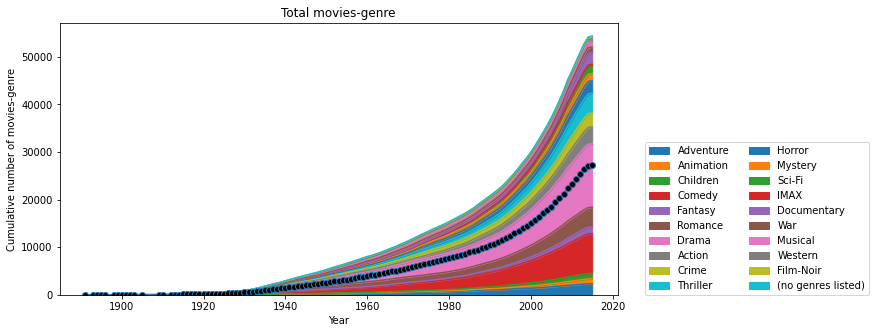

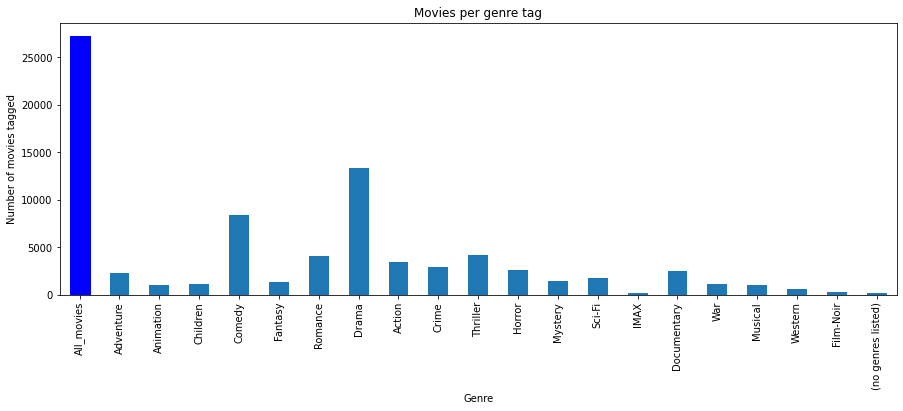

In [17]:
plt.figure(figsize=(10,5))
dftmp = movies[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})
# Plot histogram for each individual genre
for genre in genres_unique.genre:
    dftmp = movies[movies[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()
df.fillna(method='ffill', inplace=True)
df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5))
# Plot histogram for all movies
plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()
# Plot simple scatter of the number of movies tagged with each genre
plt.figure(figsize=(15,5))
barlist = df.iloc[-1].plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.show()

In [20]:
xd = pd.merge(movies, ratings)

In [21]:
xd

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story,1995.0,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,97809,3.0,1970
1,1,Toy Story,1995.0,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,51178,3.0,1970
2,1,Toy Story,1995.0,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,136073,4.0,1970
3,1,Toy Story,1995.0,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,9670,5.0,1970
4,1,Toy Story,1995.0,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,93800,5.0,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999853,131254,Kein Bund für's Leben,2007.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,79570,4.0,1970
19999854,131256,"Feuer, Eis & Dosenbier",2002.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,79570,4.0,1970
19999855,131258,The Pirates,2014.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,28906,2.5,1970
19999856,131260,Rentun Ruusu,2001.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,65409,3.0,1970


In [27]:
df0 = xd[['movieId','rating']].groupby('movieId').mean()
df0

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592
...,...
131254,4.000000
131256,4.000000
131258,2.500000


In [40]:
ratings

,userId,movieId,rating,timestamp
0,97809,1,3.0,1970
1,51178,1,3.0,1970
2,136073,1,4.0,1970
3,9670,1,5.0,1970
4,93800,1,5.0,1970
...,...,...,...,...
20000258,79570,131254,4.0,1970
20000259,79570,131256,4.0,1970
20000260,28906,131258,2.5,1970
20000261,65409,131260,3.0,1970


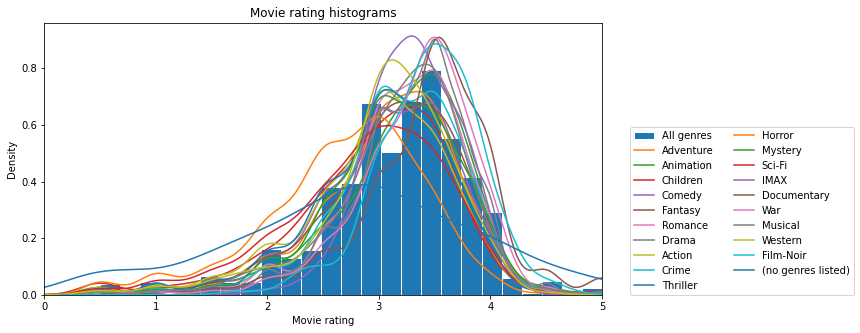

In [33]:
df0 = xd[['movieId','rating']].groupby('movieId').mean()
df0.hist(bins=25, grid=False, density = True, edgecolor='w', label ='All genres', figsize=(10,5))


for genre in genres_unique.genre:
    df0 = xd[xd[genre]==1]
    df0 = ratings[ratings.set_index('movieId').index.isin(df0.set_index('movieId').index)]
    df0 = df0[['movieId','rating']].groupby('movieId').mean()
    df0.rating.plot(grid=False,  kind='kde', label=genre)
    
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

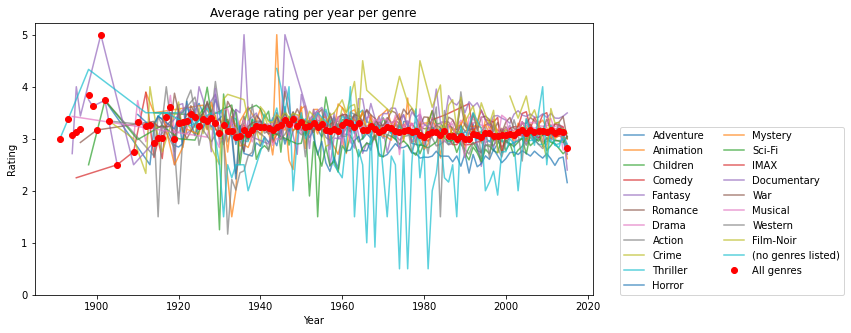

In [34]:
plt.figure(figsize=(10,5))
# For each genre
for genre in genres_unique.genre:
    # Select only movies matching current genre. Pick only movieId (as index) and year.
    dftmp = movies[movies[genre]==True][['movieId', 'year']].set_index('movieId')
    # Selects ratings, with movieId as index. Select only movies that match also the previous step. Join both.
    dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                       .groupby('movieId').mean())
    # Now we have a df of movieId, year and multiple ratings. Group by year and compute the average rating.
    dftmp = dftmp.groupby('year').mean()
    plt.plot(dftmp, label = genre, alpha=0.7)

# For all genres
dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "o", label='All genres', color='red')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average rating per year per genre')
plt.legend(loc=(1.05,0), ncol=2)
plt.ylim(0,)
plt.show()

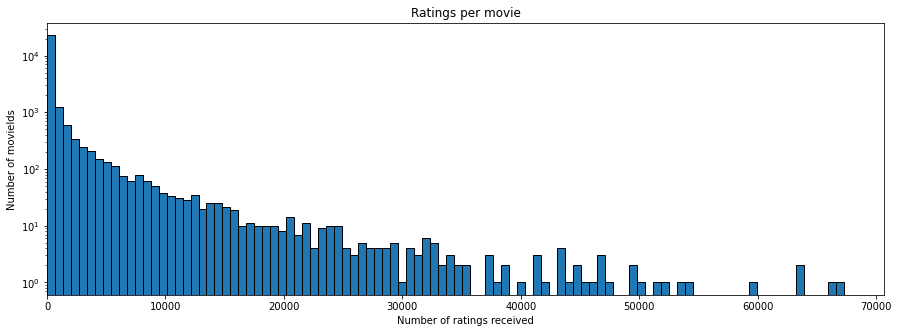

movieId
1                                               Toy Story
32                     Twelve Monkeys (a.k.a. 12 Monkeys)
47                                   Seven (a.k.a. Se7en)
50                                    Usual Suspects, The
110                                            Braveheart
150                                             Apollo 13
260                    Star Wars: Episode IV - A New Hope
296                                          Pulp Fiction
318                             Shawshank Redemption, The
356                                          Forrest Gump
377                                                 Speed
380                                             True Lies
457                                         Fugitive, The
480                                         Jurassic Park
527                                      Schindler's List
588                                               Aladdin
589                            Terminator 2: Judgment Day
590   

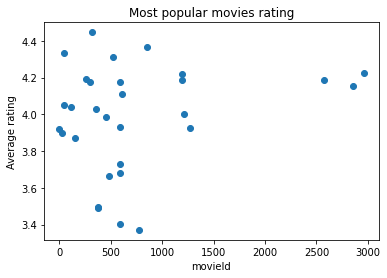

In [39]:
dftmp = ratings[['userId', 'movieId']].groupby('movieId').count()
dftmp.columns=['num_ratings']

# Histogram of ratings counts.
plt.figure(figsize=(15,5))
plt.hist(dftmp.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per movie')
plt.xlabel('Number of ratings received')
plt.ylabel('Number of movieIds')
plt.xlim(0,)
plt.show()

# Let's check those movies with +40k reviews, those should be pretty popular movies!
print(movies.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>40000]]['title'])
# Let's check the average rating too, those should be pretty good movies!
ratings.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>40000]].groupby('movieId').mean().rating.plot(style='o')
plt.ylabel('Average rating')
plt.title('Most popular movies rating')
plt.show()
